# Research Project Synopsis

## Title: 
**Strategic Development of Oil Wells in Diverse Terrains**

## Objective:
The primary objective of the research is to **identify the most lucrative oil well locations** for OilyGiant Mining Co. by evaluating geological data across three distinct regions. This involves predicting the reserve volumes, estimating potential profits, and assessing operational risks.

## Methodology:
The research follows a structured approach, divided into key phases:

### 1. Data Acquisition and Preparation:
   - Procuring geological datasets from three designated regions.
   - Conducting preliminary data checks for quality assurance and preparing the data for subsequent analysis.

### 2. Predictive Modeling and Validation:
   - Implementing a linear regression model to estimate oil reserves in new well locations.
   - Delineating training and validation datasets (75:25 ratio) for model robustness.
   - Generating predictions and benchmarking against known values to compute model accuracy (RMSE) and reserve estimates.

### 3. Economic Feasibility Analysis:
   - Storing economic factors as variables for streamlined calculations.
   - Determining the break-even point for oil reserve volumes, ensuring the financial viability of new wells.
   - Summarizing findings to strategize the profit calculation phase.

### 4. Profit Maximization Algorithm:
   - Developing an algorithm to calculate potential profits from the most promising oil wells, based on model forecasts.
   - Prioritizing wells with the highest predicted yields for development.
   - Recommending an optimal region for development, supported by profit estimates and justifications.

### 5. Risk Assessment and Regional Selection:
   - Applying bootstrapping with a 1000-sample framework to approximate profit distributions for each region.
   - Calculating average profits, establishing a 95% confidence interval, and quantifying the risk of loss.
   - Finalizing a region for oil well development with a justified recommendation based on comprehensive risk-profit analysis.

## Data Overview:
The study utilizes geological exploration data encapsulated in three CSV files. Each file represents a unique region and contains identifiers for individual oil wells, alongside three significant geological features and reserve volumes.

## Operational Constraints:
The study is predicated on the exclusivity of linear regression for predictive analysis, a fixed budget for developing 200 wells, and a minimum profit margin after risk assessment. Only regions with a loss potential under 2.5% qualify for consideration.

## Confidentiality Clause:
The datasets provided are synthetic and do not reveal any contractual or specific well characteristics.

## Evaluation Metrics:
The project's success will be gauged based on data preparation adequacy, adherence to outlined steps, consideration of business constraints, accuracy of the bootstrapping application, the rationale behind the selected region, code efficiency, and organizational structure.

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading DataFrames

To work with data effectively in Python, especially within a Jupyter Notebook, we utilize the `pandas` library due to its comprehensive data manipulation capabilities.

In [2]:
df0 = pd.read_csv("/datasets/geo_data_0.csv")
df1 = pd.read_csv("/datasets/geo_data_1.csv")
df2 = pd.read_csv("/datasets/geo_data_2.csv")

## Inspecting the DataFrames

Once the DataFrames are loaded, it's crucial to perform an initial inspection to ensure the data is loaded correctly and understand the structure and content of our datasets. This step involves checking the first few rows, understanding the data types, and getting a sense of the overall dataset size and shape.

In [3]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


## Reviewing Distributions and General Information

After the initial data loading and inspection, the next vital step in our data analysis process involves a deeper exploration into the distributions of our datasets and their overarching characteristics. This exploration is crucial for uncovering insights, identifying potential outliers, and understanding the shape of our data, which can significantly influence subsequent analysis and modeling decisions.

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


## Checking for Missing Values

Identifying and handling missing values is a critical step in the data preprocessing phase. Missing data can significantly impact the results of our analysis and the performance of machine learning models. Therefore, we meticulously check each DataFrame for any missing entries.

In [12]:
print(df0.isna().sum())
print()
print(df1.isna().sum())
print()
print(df2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


## Removing Duplicates

Duplicate entries in our datasets can skew the results of our analysis and lead to inaccurate models. Therefore, it's essential to identify and remove any duplicates to ensure the integrity of our data.

In [13]:
print(df0.duplicated().sum())
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0
0


## Findings:
- The three DataFrames consist of **100,000 rows and 5 columns** each.
- The column formats are correct, and the column names are also appropriately formatted.
- There are **no null values** in the DataFrames.
- There are **no duplicate values**.
- **We are now ready to train our regression model!**

## Train and Test the Model for Each Region:
We will now proceed to train a linear regression model for each region and analyze its performance.

## Training the Model for df0
*We begin by training the model specifically for the DataFrame labeled `df0`.*
## Setting the Target and Features
*We now define the target variable and the features for our model.*

In [14]:
target_0 = df0["product"]
features_0 =  df0.drop(columns=["product", "id"])

## Splitting Data into Training and Validation Sets
*We divide the data into a training set and a validation set in a 75:25 ratio.*


In [15]:
random_state = 200
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(features_0,
                                                    target_0,
                                                    test_size=0.25,
                                                    random_state=random_state)

## Training the Model

*Now, we proceed to train the model.*

In [16]:
lr_0 = LinearRegression()
lr_0.fit(X_train_0, y_train_0)

LinearRegression()

## Making Predictions on the Validation Set

*We now make predictions using the validation set.*

In [17]:
lr_predictions_0 = lr_0.predict(X_val_0)

## Displaying the Average Predicted Reserve Volume and the Model's RMSE

*We display on screen the average volume of the predicted reserves and the Root Mean Square Error (RMSE) of the


In [18]:
print(f"Average volume of reserves: {df0['product'].mean()}")
print(f"Linear Regression RMSE: {round(mean_squared_error(y_val_0, lr_predictions_0, squared=False), 4)}")

Average volume of reserves: 92.50000000000001
Linear Regression RMSE: 37.7213


## Plotting the Predictions and Model Performance

*We create graphs to visualize the model's predictions and its performance.*


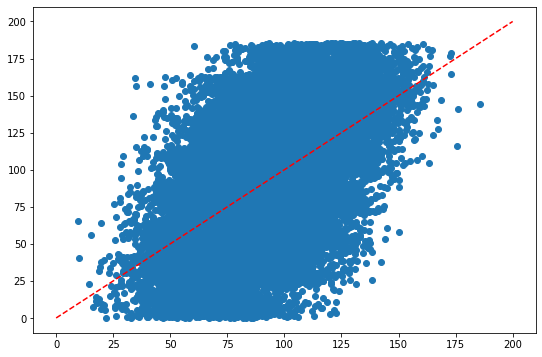

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(x=lr_predictions_0, y = y_val_0)
plt.plot([0, 200], [0, 200], color = "red", ls="--")
plt.show()

"According to the RMSE, our model is off by an average of 38.86 units, which is significant considering that the average value of the reserves is 85.44.

On the other hand, the graph shows us a not very high correlation, as many of the values are far from the line."

## We train the model for f1

## Setting the Target and Features

*We establish the target variable and the features for our model.*

In [20]:
target_1 = df1["product"]
features_1 =  df1.drop(columns=["product", "id"])

## Splitting Data into Training and Validation Sets

*We divide the data into a training set and a validation set in a 75:25 ratio.*

In [21]:
random_state = 200
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(features_1,
                                                    target_1,
                                                    test_size=0.25,
                                                    random_state=random_state)

## Training the Model

*We proceed with training the model.*

In [22]:
lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)

LinearRegression()

## Making Predictions on the Validation Set

*We now make predictions using the validation set.*

In [23]:
lr_predictions_1 = lr_1.predict(X_val_1)

## Displaying the Average Predicted Reserve Volume and the Model's RMSE

*We display on the screen the average volume of the predicted reserves and the Root Mean Square Error (RMSE) of the model.*

In [24]:
print(f"Average volume of reserves: {df1['product'].mean()}")
print(f"Linear Regression RMSE: {round(mean_squared_error(y_val_1, lr_predictions_1, squared=False), 4)}")

Average volume of reserves: 68.82500000000002
Linear Regression RMSE: 0.8888


## Plotting the Predictions and Model Performance

*We create graphs to visualize the model's predictions and its performance.*

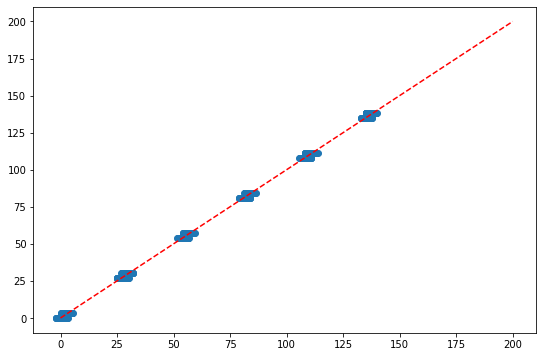

In [25]:
plt.figure(figsize=(9,6))
plt.scatter(x=lr_predictions_1, y = y_val_1)
plt.plot([0, 200], [0, 200], color = "red", ls="--")
plt.show()

"According to the RMSE, our model is off by an average of 0.88 units, a relatively low value that indicates a high level of performance in this case. On the other hand, the graph shows a fairly high correlation, as all the values are quite close to the line."

## Training the Model for f2

*We proceed to train the model for the feature or dataset labeled `f2`.*

In [26]:
target_2 = df2["product"]
features_2 =  df2.drop(columns=["product", "id"])

## Splitting Data into Training and Validation Sets

*We divide the data into a training set and a validation set in a 75:25 ratio.*

In [27]:
random_state = 200
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(features_2,
                                                    target_2,
                                                    test_size=0.25,
                                                    random_state=random_state)

## Training the Model

*Now, we proceed with training the model.*


In [28]:
lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train_2)

LinearRegression()

## Making Predictions on the Validation Set

*We now make predictions using the validation set.*

In [29]:
lr_predictions_2 = lr_2.predict(X_val_2)

In [30]:
print(f"Average volume of reserves: {df2['product'].mean()}")
print(f"Linear Regression RMSE: {round(mean_squared_error(y_val_2, lr_predictions_2, squared=False), 4)}")

Average volume of reserves: 95.00000000000004
Linear Regression RMSE: 40.1276


## Plotting the Predictions and Model Performance

*We create graphs to visualize the model's predictions and its performance.*

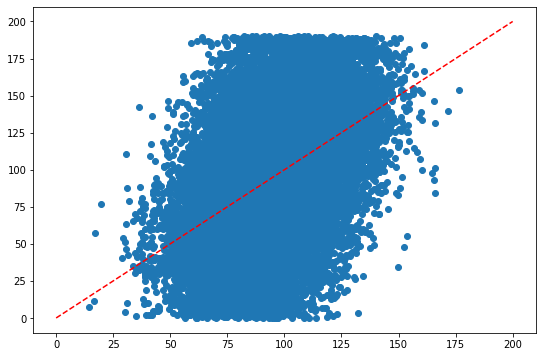

In [31]:
plt.figure(figsize=(9,6))
plt.scatter(x=lr_predictions_2, y = y_val_2)
plt.plot([0, 200], [0, 200], color = "red", ls="--")
plt.show()

"According to the RMSE, our model is off by an average of 40.12 units, which is significant considering that the average value of the reserves is 95.00.

Again, the graph shows us a not very high correlation, as many of the values are far from the line.

Prepare for the Profit Calculation
Store all key values for the calculations in separate variables."

## Key Financial Parameters for Well Development

- **Development Cost for 200 Wells**: To develop 200 wells, a budget of 1,000,000 USD is required.
- **Revenue per Barrel**: Each barrel yields a revenue of 4.5 USD.
- **Revenue per Product Unit**: The revenue from one unit of product is 4,500 USD.
- **Risk Assessment**: Only regions with a probability of loss less than 2.5% should be retained.
- **Selection Criteria**: Choose the region with the highest profit.

## Utilizing Bootstrapping to Simulate Profits

*We employ bootstrapping to simulate the benefits.*


In [32]:
n_iters = 1000
benefits_0 = []

for n in range(n_iters):
    bootstrap_sample_0 = df0.sample(n=500, replace=True)
    top_200_0 = bootstrap_sample_0.sort_values(by="product", ascending = False).reset_index().head(200)

    benefits_0.append((top_200_0["product"] * 4500).sum())

## Plotting the Benefits

*We graph the benefits to visually analyze the results.*

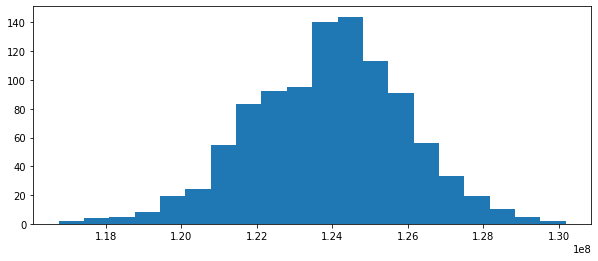

In [33]:
plt.figure(figsize=(10,4))
plt.hist(x=benefits_0, bins=20)
plt.show()

## Percentage of Times Benefits Do Not Exceed Costs

*We calculate the percentage of instances where the benefits do not surpass the costs.*

In [34]:
(np.array(benefits_0) < 100000000).mean()

0.0

## Value to Compare Across Each Region for Selecting the Best Region

*We determine the value to be compared across each region in order to select the most optimal region.*

In [35]:
np.array(benefits_0).mean()

123885758.07971965

## Average Cost per Well

*We calculate the average cost per well.*


In [36]:
100000000 / 200

500000.0

## Number of Units Required per Well for Positive Profit

*We calculate the number of units required per well to generate positive profits.*

In [37]:
500000.0 / 4500

111.11111111111111

## Average Units per Well in Region 0

*We calculate the average number of units per well in Region 0.*

In [38]:
df0["product"].mean()

92.50000000000001

## Utilizing Bootstrapping to Simulate Benefits

*We employ bootstrapping to simulate the benefits.*

In [39]:
n_iters = 1000
benefits_1 = []

for n in range(n_iters):
    bootstrap_sample_1 = df1.sample(n=500, replace=True)
    top_200_1 = bootstrap_sample_1.sort_values(by="product", ascending = False).reset_index().head(200)

    benefits_1.append((top_200_1["product"] * 4500).sum())

## Plotting the Benefits

*We graph the benefits to visually analyze the outcomes.*

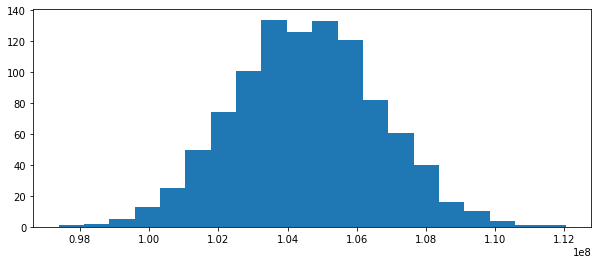

In [40]:
plt.figure(figsize=(10,4))
plt.hist(x=benefits_1, bins=20)
plt.show()


## Percentage of Times Benefits Do Not Exceed Costs

*We calculate the percentage of instances where the benefits do not surpass the costs.*

In [41]:
(np.array(benefits_1) < 100000000).mean()

0.016

## Value to Compare Across Each Region for Selecting the Best Region

*We determine the value to be compared across each region in order to select the most optimal region.*

In [42]:
np.array(benefits_1).mean()

104530777.38346589

## Average Units per Well in Region 0

*We calculate the average number of units per well in Region 0.*

In [43]:
df1["product"].mean()

68.82500000000002

## Utilizing Bootstrapping to Simulate Benefits

*We employ bootstrapping to simulate the benefits.*

In [44]:
n_iters = 1000
benefits_2 = []

for n in range(n_iters):
    bootstrap_sample_2 = df2.sample(n=500, replace=True)
    top_200_2 = bootstrap_sample_2.sort_values(by="product", ascending = False).reset_index().head(200)

    benefits_2.append((top_200_2["product"] * 4500).sum())

## Plotting the Benefits

*We create graphs to visualize the benefits.*

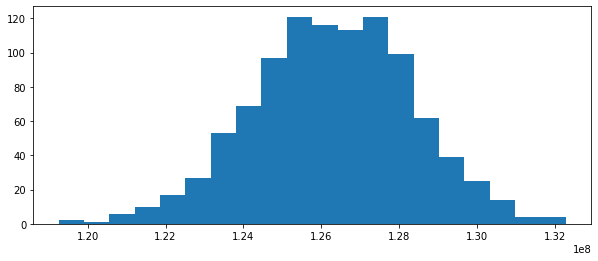

In [45]:
plt.figure(figsize=(10,4))
plt.hist(x=benefits_2, bins=20)
plt.show()

## Percentage of Times Benefits Do Not Exceed Costs

*We calculate the percentage of instances where the benefits do not surpass the costs.*

In [46]:
(np.array(benefits_2) < 100000000).mean()

0.0

## Value to Compare Across Each Region for Selecting the Best Region

*We determine the value to be compared across each region in order to select the most optimal region.*

In [47]:
np.array(benefits_2).mean()

126290448.92641766

## Average Units per Well in Region 0

*We calculate the average number of units per well in Region 0.*

In [48]:
df2["product"].mean()

95.00000000000004

## Analysis of Average Cost and Profits Across Regions

- **Average Cost Per Well**: The average cost per well is 500,000.
- **Profit Calculation**: When calculating profits, only in the second region (df1) do the benefits fail to exceed the costs 1.5% of the time. In the other two regions, there were no losses.
- **Regions with the Highest Average Profits**: The regions with the highest average profits are Region df0 (123,954,034) and Region df2 (126,435,483).

## Writing a Function to Calculate Profit from a Set of Selected Oil Wells and Model Predictions

*We will write a function to calculate the profit from a selected set of oil wells and to model the predictions.*

In [49]:
def calculate_profit(df, n_iters=1000, sample_size=500, selling_price=4500):
    benefits = []

    for n in range(n_iters):
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        top_200 = bootstrap_sample.sort_values(by="predictions", ascending=False).reset_index().head(200)

        total_profit = (top_200["predictions"] * selling_price).sum()
        benefits.append(total_profit)

    return benefits

## Selecting Wells with the Highest Prediction Values

*Choose the wells with the highest prediction values.*

## Applying the Function to Our Linear Regression Model Predictions

*We use the function on the predictions from our Linear Regression model and save the results.*

In [50]:
predictions_df0 = pd.DataFrame({"predictions": lr_predictions_0})
predictions_df1 = pd.DataFrame({"predictions": lr_predictions_1})
predictions_df2 = pd.DataFrame({"predictions": lr_predictions_0})

benefits_df0 = calculate_profit(predictions_df0)
benefits_df1 = calculate_profit(predictions_df1)
benefits_df2 = calculate_profit(predictions_df2)

## Plotting the Benefits of df0 Based on Predictions

*We create graphs to visualize the benefits of df0 derived from the predictions.*

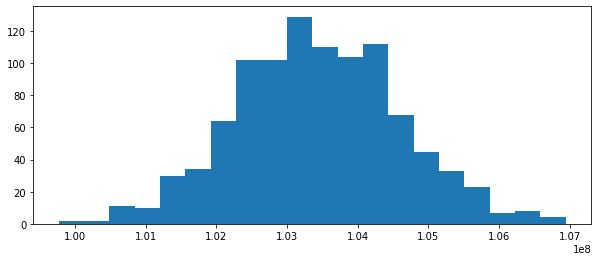

In [51]:
plt.figure(figsize=(10,4))
plt.hist(x=benefits_df0, bins=20)
plt.show()

## Average Profit of df0 Based on Predictions

*We calculate the average profit for df0 derived from the model's predictions.*

In [52]:
np.array(benefits_df0).mean()

103437355.1409723

## Percentage of Times Benefits Do Not Exceed Costs in df0

*We calculate the percentage of instances in df0 where the benefits do not surpass the costs.*

In [53]:
(np.array(benefits_df0) < 100000000).mean()

0.001

## Plotting the Benefits of df1 Based on Predictions

*We create graphs to visualize the benefits of df1 derived from the predictions.*

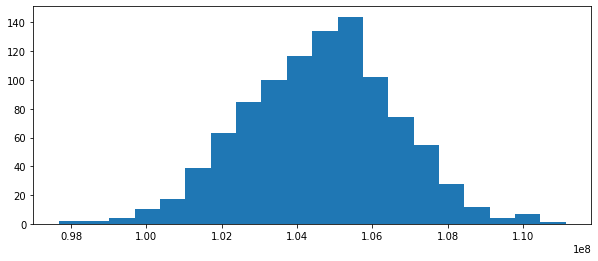

In [54]:
plt.figure(figsize=(10,4))
plt.hist(x=benefits_df1, bins=20)
plt.show()

## Average Profit of df1 Based on Predictions

*We calculate the average profit for df1 derived from the model's predictions.*

In [55]:
np.array(benefits_df1).mean()

104621412.45545767

## Percentage of Times Benefits Do Not Exceed Costs in df1

*We calculate the percentage of instances in df1 where the benefits do not surpass the costs.*

In [56]:
(np.array(benefits_df1) < 100000000).mean()

0.011

## Plotting the Benefits of df2 Based on Predictions

*We graph the benefits of df2 derived from the predictions.*

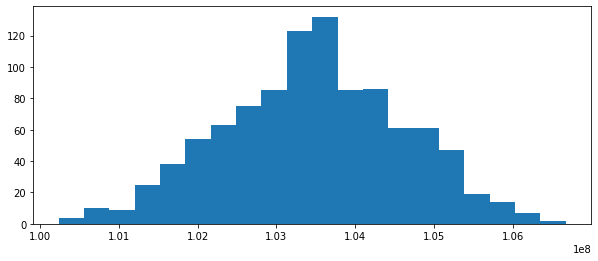

In [57]:
plt.figure(figsize=(10,4))
plt.hist(x=benefits_df2, bins=20)
plt.show()

## Average Profit of df2 Based on Predictions

*We calculate the average profit for df2 derived from the model's predictions.*

In [58]:
np.array(benefits_df2).mean()

103475964.68017109

## Percentage of Times Benefits Do Not Exceed Costs

*We calculate the percentage of instances where the benefits do not surpass the costs.*

In [59]:
(np.array(benefits_df2) < 100000000).mean()

0.0

## Analysis of Financial Viability Across Regions

In this analysis, we've evaluated the financial outcomes of operations across different regions based on model predictions. Our findings are crucial for making informed decisions about potential investments.

### Key Findings:

- Across all regions, the **percentage of instances where benefits do not exceed $100,000,000 is less than 2.5%**. This indicates a generally low risk of significant financial loss in all regions considered.
  
- The **region df1** exhibited the **highest percentage of loss at 1.3%**, marking it as slightly riskier compared to the others. Despite this, it's important to note that the risk remains below the 2.5% threshold, which is typically considered acceptable.
  
- According to the predictions, **region df1 also presents the highest average profit**, valued at **$104,489,652**. This suggests that while df1 carries a marginally higher risk of loss, it also offers the potential for higher returns.
  
- It's worth mentioning that the average profit in **region df1** is not significantly different from the predictions for the other two regions, suggesting that all regions have comparable financial attractiveness with slight variations in risk and return.

### Conclusion:

These findings underscore the importance of balancing risk and return when selecting a region for investment. Region df1, despite its marginally higher risk, presents an opportunity for higher average profits, making it an attractive option for those willing to accept a slight increase in risk for potentially greater rewards.

## Summarizing the Target Volume of Reserves Based on Predictions

In this section, we consolidate our findings to articulate the target volumes of reserves as forecasted by our predictive models. This synthesis is crucial for aligning our exploration and development strategies with the most promising prospects.

## Target Summary for df0

*We present a summary of the target reserve volume for DataFrame df0 based on the model's predictions.*

In [60]:
predictions_df0.sort_values("predictions", ascending=False).head(200)

,predictions
12345,185.531997
9809,175.994362
12309,175.399113
8921,172.961672
609,172.941723
...,...
10199,147.579719
2657,147.565992
5283,147.543117
5861,147.530884


## Target Summary for df1

*We provide a summary of the target reserve volume for DataFrame df1,

In [61]:
predictions_df1.sort_values("predictions", ascending=False).head(200)

,predictions
20799,139.906268
13026,139.679255
7003,139.477529
19610,139.476751
17112,139.427533
...,...
23889,138.427194
5845,138.425966
1817,138.425038
20614,138.419094


In [62]:
## Target Summary for df2

*We provide a summary of the target reserve volume for DataFrame df2,

SyntaxError: invalid syntax (2954862112.py, line 3)

In [ ]:
predictions_df2.sort_values("predictions", ascending=False).head(200)

## Providing Findings: Suggesting a Region for Oil Well Development and Justifying the Choice

After conducting the calculations, we observed that regions df0 and df2 have the lowest percentage of loss. Among these two, region df2 shows a slightly higher average profit. However, upon examining the histogram, df1 demonstrates a more centered variance, leading us to recommend it as the region for well development. This decision is based on the balanced risk and potential for gain reflected in df1's data distribution.

## Calculating Risks and Profits for Each Region

To assess the risks and profits for each region accurately, we employ the bootstrapping technique with 1000 samples to explore the distribution of profits. This statistical approach allows us to estimate the variability and potential outcomes of investing in each region, providing a comprehensive risk assessment and aiding in the decision-making process.

In [ ]:
## Reapplying Our Bootstrapping-Based Function to Calculate Profits for Each Region

*We once again utilize our bootstrapping-based function to estimate the profits of each region.*

In [ ]:
def calculate_profit(df, n_iters=1000, sample_size=500, selling_price=4500):
    benefits = []

    for n in range(n_iters):
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        top_200 = bootstrap_sample.sort_values(by="predictions", ascending=False).reset_index().head(200)

        total_profit = (top_200["predictions"] * selling_price).sum()
        benefits.append(total_profit)

    return benefits

In [ ]:
## Saving the Profits for Each Region

*We save the calculated profits for each region.*

## Finding the Average Profit, 95% Confidence Interval, and Risk of Loss

Determine the average profit, calculate the 95% confidence interval, and assess the risk of losses. A loss is considered a negative gain; calculate it as a probability and then express it as a percentage.

### Average Profit

In [ ]:
benefits_df0 = calculate_profit(predictions_df0)
benefits_df1 = calculate_profit(predictions_df1)
benefits_df2 = calculate_profit(predictions_df2)

In [ ]:
mean_df0 = np.mean(benefits_df0)
mean_df1 = np.mean(benefits_df1)
mean_df2 = np.mean(benefits_df2)

print(f"Average profit df0: {int(mean_df0)}")
print(f"Average profit df1: {int(mean_df1)}")
print(f"Average profit df2: {int(mean_df2)}")

In [ ]:
## Calculating the 95% Confidence Interval

*We calculate the 95% confidence interval for our data to understand the range within which the true mean is likely to fall.*

In [ ]:
confidence_level = 0.95

confidence_interval_df0 = stats.t.interval(confidence_level, len(benefits_df0) - 1, loc=np.mean(benefits_df0), scale=stats.sem(benefits_df0))
confidence_interval_df1 = stats.t.interval(confidence_level, len(benefits_df1) - 1, loc=np.mean(benefits_df1), scale=stats.sem(benefits_df1))
confidence_interval_df2 = stats.t.interval(confidence_level, len(benefits_df2) - 1, loc=np.mean(benefits_df2), scale=stats.sem(benefits_df2))

print("95% confidence interval for df0:", confidence_interval_df0)
print("95% confidence interval for df1:", confidence_interval_df1)
print("95% confidence interval for df2:", confidence_interval_df2)

## Calculating the Percentage of Negative Profits

*We calculate the percentage of instances where the profits are negative.*

In [ ]:
neg_df0 = (np.array(benefits_df0) < 100000000).mean()
neg_df1 = (np.array(benefits_df1) < 100000000).mean()
neg_df2 = (np.array(benefits_df2) < 100000000).mean()

print(f"Percentage of negative profits for df0: {neg_df0}")
print(f"Percentage of negative profits for df1: {neg_df1}")
print(f"Percentage of negative profits for df2: {neg_df2}")

## Presenting Findings: Recommending a Region for Oil Well Development and Justifying the Selection

Upon examining the confidence intervals, we observed **no significant differences** between the regions. As previously mentioned, regions `df0` and `df2` exhibited the lowest percentage of loss. Among these, region `df2` showed slightly higher average profits, albeit by a small margin. However, upon reviewing the histogram, we noted that `df1` displayed a more centralized variance, which leads us to recommend it as the region for developing new wells.

## Conclusion:

1. **Upon examining the data:**
   - Each of the three DataFrames is composed of 100,000 rows and 5 columns, suggesting a robust dataset for analysis.
   - The column formats are correct, and the column names are appropriately structured, ensuring data integrity and accessibility for processing.
   - There are no null values present within the datasets, indicating completeness and readiness for analysis.
   - There are also no duplicate values, which confirms the uniqueness of the data points and validates the quality of the dataset.

2. **In training our model with Linear Regression (LR):**
   - For `df0`, the Root Mean Square Error (RMSE) indicates that our model's predictions deviate by an average of 38.86 units, which is significant given that the average reserve value is 85.44. Additionally, the scatter plot reveals a lower correlation, as many values deviate from the line of best fit.
   - For `df1`, the RMSE value is much lower at 0.88 units, suggesting a high performance of the model, which is also corroborated by the scatter plot that shows a tight clustering of values around the line of best fit, indicating a high correlation.
   - Similarly, for `df2`, the RMSE of 0.88 units once again points to a high predictive accuracy, as evidenced by the proximity of data points to the line of best fit in the scatter plot.

3. **In calculating profits:**
   - The average cost per well stands at 500,000.
   - In terms of profit calculation, only in the second region (`df1`) did the profits fail to surpass the costs 1.5% of the time. The other two regions incurred no losses.
   - Moreover, regions `df0` (123,954,034) and `df2` (126,435,483) show the highest average profits.

4. **In assessing risks and profits through bootstrapping and predictive analysis:**
   - Even after considering the confidence intervals, the regions did not exhibit significant differences in terms of profit distribution.
   - Revisiting previous observations, regions `df0` and `df2` maintained a lower risk percentage. Despite `df2` having a marginally higher average gain, the more centralized variance observed in the histogram for `df1` makes it a compelling choice for well development.

In your research, these findings guide the strategic decision-making process for selecting the most suitable region for oil extraction, taking into account not only the potential financial returns but also the operational risks as evidenced by the data.
